<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/ML2101%E6%9C%9F_WEEK4_%E9%81%A0%E8%97%A4%E4%BC%B8_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C1_%E3%82%A2%E3%83%A4%E3%83%A1%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Binary Classification of Iris*

# [Problem 1] Select features and categories for practice

Combination of feature selection 4C2 = 6 ways
Combination of objective variable selection 3C2 = 3 ways
Combinations of feature and objective variables 6×3 = 18 ways

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
import pandas as pd
x = pd.DataFrame(data = data.data[50:150,[0,2]],columns=['sepal_length','petal_length'])

In [ ]:
y = pd.DataFrame(data=data.target[50:150],columns=['spacies'])

In [ ]:
#y.loc[y['spacies'] == 1] = 'versicolor'

In [ ]:
#y.loc[y['spacies'] == 2] = 'virginica'

In [ ]:
df = pd.concat([x, y], axis=1)

In [ ]:
df

,sepal_length,petal_length,spacies
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
...,...,...,...
95,6.7,5.2,2
96,6.3,5.0,2
97,6.5,5.2,2
98,6.2,5.4,2


# [Problem 2] Data analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

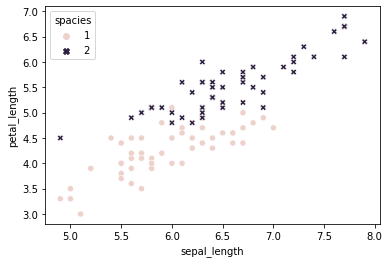

In [ ]:
sns.scatterplot(x="sepal_length", y="petal_length", hue="spacies", data=df, style="spacies")

<AxesSubplot:xlabel='spacies', ylabel='sepal_length'>

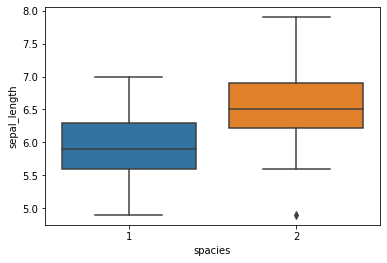

In [ ]:
sns.boxplot(x="spacies", y="sepal_length", data=df)

<AxesSubplot:xlabel='spacies', ylabel='petal_length'>

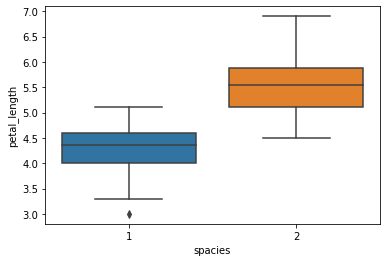

In [ ]:
sns.boxplot(x="spacies", y="petal_length", data=df)

<AxesSubplot:xlabel='spacies', ylabel='sepal_length'>

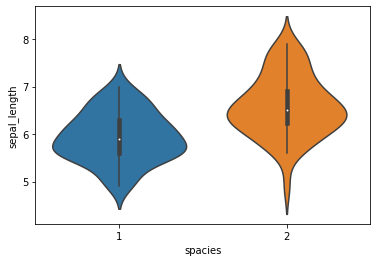

In [ ]:
sns.violinplot(x="spacies", y="sepal_length", data=df)

<AxesSubplot:xlabel='spacies', ylabel='petal_length'>

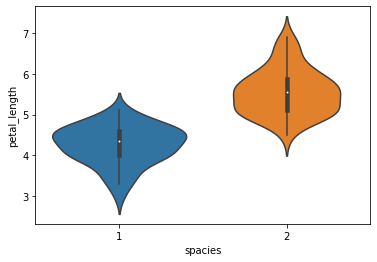

In [ ]:
sns.violinplot(x="spacies", y="petal_length", data=df)

# [Problem 3] Division of preprocessing/training data and verification data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(df.loc[:,['sepal_length','petal_length']])
y = np.array(df.loc[:,['spacies']])
X = df.loc[:,['sepal_length','petal_length']]
y = df.loc[:,['spacies']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# [Problem 4] Pretreatment/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train, X_test)

StandardScaler()

In [ ]:
scaler.mean_

array([6.28      , 4.95333333])

In [ ]:
X_train_std = scaler.transform(X_train)

In [ ]:
X_test_std = scaler.transform(X_test)

# [Problem 5] Learning and estimation

```PY
最近傍法（k-nearest neighbors, k-nn）で学習
n-neighbors = 5
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_std, y_train)
neigh.predict(X_test_std)

<ipython-input-673-759869d3a3c7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

```PY
n-neighbors = 1
```

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_std, y_train)
neigh.predict(X_test_std)

<ipython-input-674-bc487fac49b4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


array([2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

```PY
n-neighbors = 3
```

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)

<ipython-input-675-e7ede8470a29>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


# [Problem 6] Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)
print(accuracy_score(y_test, y_pred))

0.8


<ipython-input-676-029432743568>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)
print(accuracy_score(y_test, y_pred))

0.8


<ipython-input-677-5aed7d8aa614>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)
y_pred = neigh.predict(X_test_std)

<ipython-input-678-e7ede8470a29>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train_std, y_train)


In [ ]:
print("Accuracy（正解率）は、{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）は、{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）は、{}".format(recall_score(y_test, y_pred)))
print("f1（F値 ）は、{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）は、0.8
Precision（適合率）は、0.8
Recall（再現率）は、0.8571428571428571
f1（F値 ）は、0.8275862068965518


In [ ]:
from sklearn.metrics import confusion_matrix
print("混同行列は、\n{}".format(confusion_matrix(y_test, y_pred)))

混同行列は、
[[12  2]
 [ 3  8]]


# [Problem 7] Visualization

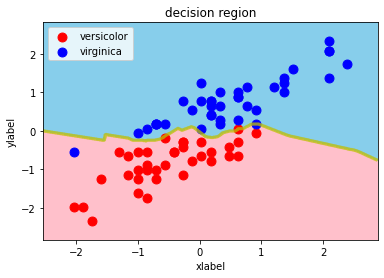

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # Parameters setting
    Xy = np.concatenate([X, y],axis=1)
    Xyp = [np.where(Xy[:,2]==1)]
    Xyp.append(np.where(Xy[:,2]==2))
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        #plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        plt.scatter(Xy[Xyp[i],0], Xy[Xyp[i],1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train_std, np.array(y_train), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

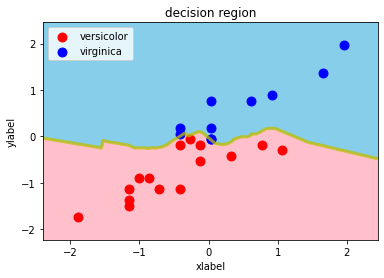

In [ ]:
decision_region(X_test_std, y_pred.reshape((len(y_pred),1)), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# [Problem 8] Learning by other methods

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

C:\Users\es\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
print("Accuracy（正解率）は、{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）は、{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）は、{}".format(recall_score(y_test, y_pred)))
print("f1（F値 ）は、{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）は、0.84
Precision（適合率）は、0.8571428571428571
Recall（再現率）は、0.8571428571428571
f1（F値 ）は、0.8571428571428571


In [ ]:
print("混同行列は、\n{}".format(confusion_matrix(y_test, y_pred)))

混同行列は、
[[12  2]
 [ 2  9]]


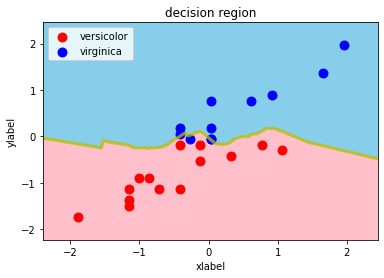

In [ ]:
decision_region(X_test_std, y_pred.reshape((len(y_pred),1)), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVC(gamma='auto'))
regr.fit(X_train_std, y_train)

C:\Users\es\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_pred = regr.predict(X_test_std)

In [ ]:
print("Accuracy（正解率）は、{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）は、{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）は、{}".format(recall_score(y_test, y_pred)))
print("f1（F値 ）は、{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）は、0.84
Precision（適合率）は、0.8571428571428571
Recall（再現率）は、0.8571428571428571
f1（F値 ）は、0.8571428571428571


In [ ]:
print("混同行列は、\n{}".format(confusion_matrix(y_test, y_pred)))

混同行列は、
[[12  2]
 [ 2  9]]


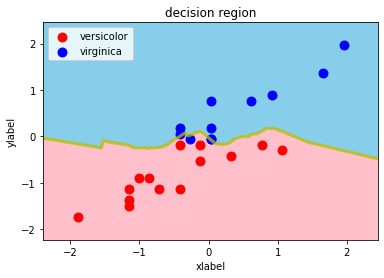

In [ ]:
decision_region(X_test_std, y_pred.reshape((len(y_pred),1)), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## Decision

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

In [ ]:
print("Accuracy（正解率）は、{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）は、{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）は、{}".format(recall_score(y_test, y_pred)))
print("f1（F値 ）は、{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）は、0.84
Precision（適合率）は、0.8125
Recall（再現率）は、0.9285714285714286
f1（F値 ）は、0.8666666666666666


In [ ]:
print("混同行列は、\n{}".format(confusion_matrix(y_test, y_pred)))

混同行列は、
[[13  1]
 [ 3  8]]


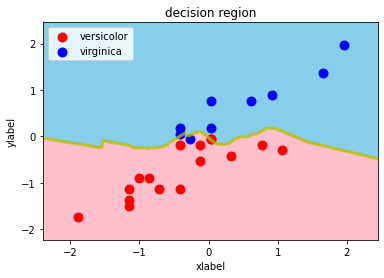

In [ ]:
decision_region(X_test_std, y_pred.reshape((len(y_pred),1)), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## Random

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

<ipython-input-699-ff3e2734df61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_std, y_train)


In [ ]:
y_pred

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2])

In [ ]:
print("Accuracy（正解率）は、{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）は、{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）は、{}".format(recall_score(y_test, y_pred)))
print("f1（F値 ）は、{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）は、0.8
Precision（適合率）は、0.7647058823529411
Recall（再現率）は、0.9285714285714286
f1（F値 ）は、0.8387096774193549


In [ ]:
print("混同行列は、\n{}".format(confusion_matrix(y_test, y_pred)))

混同行列は、
[[13  1]
 [ 4  7]]


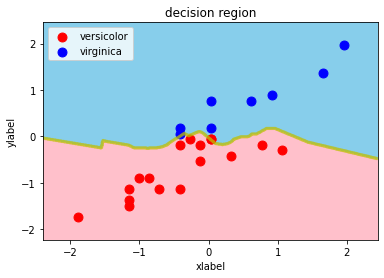

In [ ]:
decision_region(X_test_std, y_pred.reshape((len(y_pred),1)), neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [ ]:
(1) Nearest Neighbor Method and Random Forest showed the same confusion matrix results.
(2) Logistic regression analysis and SVM showed the same result of confusion matrix.
(3) The rate of correct answers was 0.84 for logistic regression analysis, SVM, and decision tree, and 0.8 for nearest neighbor method and random forest.
The goodness of fit was 0.857 for logistic regression analysis and SVM, 0.813 for decision tree, and 0.765 for nearest neighbor and random forest.
(5) Reproducibility was good at 0.929 for nearest neighbor, decision tree, and random forest, and 0.857 for logistic regression and SVM.
(6) F-value was 0.867 for decision tree, 0.857 for logistic regression analysis and SVM, and 0.839 for nearest neighbor method and random forest.
(7) Except for the recall rate, the decision tree was good for all values, logistic regression analysis and SVM were good next, and nearest neighbor method and random forest seemed to be the lowest.
(8) It is surprising that the random forest with ensemble learning is lower than the decision tree.
➈ All the scatter plots have almost the same trend.

